# SGA-PMX Demo

Skrypt przedstawia przykładową implementację algorytmu Simple Genetic Algorithm (SGA) z operatorem PMX i jego zastosowanie do rozwiązywania problemu komiwojażera (ang. Travelling Salesman Problem, TSP). Popularne instancje problemu TSP można znaleźć w bibliotece TSPLib [1]. Skrypt skupia się na rozwiązywaniu instancji BERLIN52, w celu rozwiązywania innych instancji może okazać się konieczna zmiana ustawień parametrów algorytmu, a może też i operatorów ewolucyjnych.

Literatura:

[1] TSPLIB, http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import time
import tsplib95

%matplotlib inline

## Input data

In [5]:
# BERLIN52

berlin52n = 52
print('Problem size: %d' % berlin52n)

coords = np.array([565.0, 575.0, 25.0, 185.0, 345.0, 750.0, 945.0, 685.0, 845.0, 655.0, 880.0, 660.0, 25.0, 230.0, 525.0, 1000.0, 580.0, 1175.0, 650.0, 1130.0, 1605.0, 620.0, 1220.0, 580.0, 1465.0, 200.0, 1530.0, 5.0, 845.0, 680.0, 725.0, 370.0, 145.0, 665.0, 415.0, 635.0, 510.0, 875.0, 560.0, 365.0, 300.0, 465.0, 520.0, 585.0, 480.0, 415.0, 835.0, 625.0, 975.0, 580.0, 1215.0, 245.0, 1320.0, 315.0, 1250.0, 400.0, 660.0, 180.0, 410.0, 250.0, 420.0, 555.0, 575.0, 665.0, 1150.0, 1160.0, 700.0, 580.0, 685.0, 595.0, 685.0, 610.0, 770.0, 610.0, 795.0, 645.0, 720.0, 635.0, 760.0, 650.0, 475.0, 960.0, 95.0, 260.0, 875.0, 920.0, 700.0, 500.0, 555.0, 815.0, 830.0, 485.0, 1170.0, 65.0, 830.0, 610.0, 605.0, 625.0, 595.0, 360.0, 1340.0, 725.0, 1740.0, 245.0])
coords = coords.reshape(berlin52n, 2)

A = np.empty((berlin52n, berlin52n))
for i in range(berlin52n):
    for j in range(berlin52n):
        A[i, j] = np.sqrt(((coords[i, :] - coords[j, :])**2).sum())
print('Distance matrix:\n', A)

p = [0, 48, 31, 44, 18, 40,  7,  8,  9, 42, 32, 50, 10, 51, 13, 12, 46, 25, 26, 27, 11, 24,  3,  5, 14,  4, 23, 47, 37, 36, 39, 38, 35, 34, 33, 43, 45, 15, 28, 49, 19, 22, 29,  1,  6, 41, 20, 16,  2, 17, 30, 21]
print('Optimal solution:\n', p)

Problem size: 52
Distance matrix:
 [[   0.          666.10809934  281.11385594 ...  217.08293346
   789.38267019 1220.46097848]
 [ 666.10809934    0.          649.32657423 ...  596.25917184
  1421.55724471 1716.04924172]
 [ 281.11385594  649.32657423    0.         ...  463.24939288
   995.3140208  1483.59361012]
 ...
 [ 217.08293346  596.25917184  463.24939288 ...    0.
   829.60834133 1150.76061803]
 [ 789.38267019 1421.55724471  995.3140208  ...  829.60834133
     0.          624.81997407]
 [1220.46097848 1716.04924172 1483.59361012 ... 1150.76061803
   624.81997407    0.        ]]
Optimal solution:
 [0, 48, 31, 44, 18, 40, 7, 8, 9, 42, 32, 50, 10, 51, 13, 12, 46, 25, 26, 27, 11, 24, 3, 5, 14, 4, 23, 47, 37, 36, 39, 38, 35, 34, 33, 43, 45, 15, 28, 49, 19, 22, 29, 1, 6, 41, 20, 16, 2, 17, 30, 21]


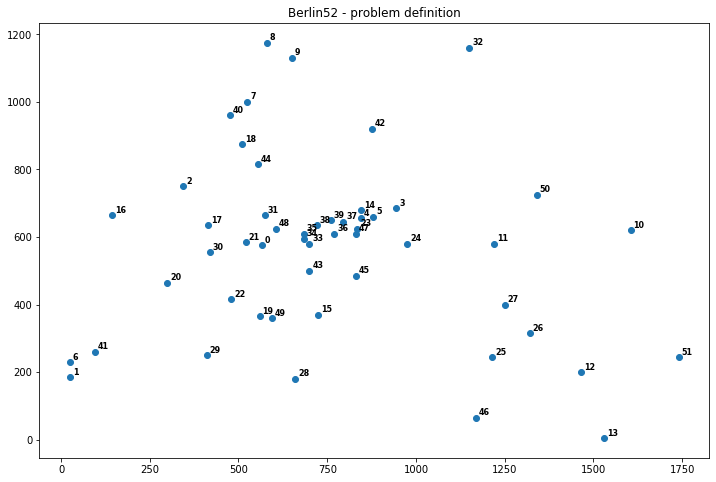

In [6]:
plt.figure(figsize=(12,8))

plt.plot(coords[:, 0], coords[:, 1], 'o')

for i in range(berlin52n):
    plt.text(coords[i, 0]+8, coords[i, 1]+8, str(i), fontdict={'weight':'bold', 'size':8})

plt.title('Berlin52 - problem definition')

plt.show()

<Figure size 864x576 with 0 Axes>

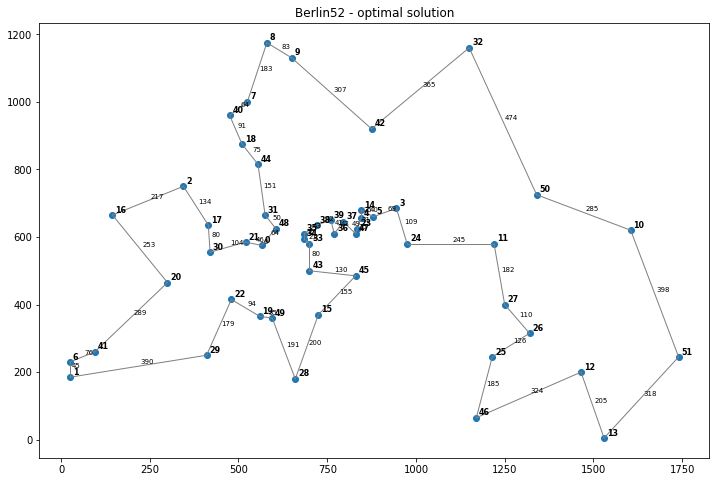

In [7]:
from matplotlib.lines import Line2D

route = p

plt.figure(figsize=(12,8))
fig, ax = plt.subplots(figsize=(12,8))

plt.plot(coords[:, 0], coords[:, 1], 'o')

for i in range(berlin52n):
    plt.text(coords[i, 0]+8, coords[i, 1]+8, str(i), fontdict={'weight':'bold', 'size':8})

ax.add_line(Line2D(
    [coords[0, 0], coords[route[0], 0]],
    [coords[0, 1], coords[route[0], 1]],
    linewidth=1, color='gray'))
plt.text((coords[0, 0] + coords[route[0], 0])/2 + 6,
         (coords[0, 1] + coords[route[0], 1])/2 + 6,
         '%d' % A[0, route[0]], fontdict={'weight':'normal', 'size':7})
for i in range(1, len(route)):
    ax.add_line(Line2D(
        [coords[route[i-1], 0], coords[route[i], 0]],
        [coords[route[i-1], 1], coords[route[i], 1]],
        linewidth=1, color='gray'))
    plt.text((coords[route[i-1], 0] + coords[route[i], 0])/2 + 6,
             (coords[route[i-1], 1] + coords[route[i], 1])/2 + 6,
             '%d' % A[route[i-1], route[i]], fontdict={'weight':'normal', 'size':7})
ax.add_line(Line2D(
    [coords[route[-1], 0], coords[0, 0]],
    [coords[route[-1], 1], coords[0, 1]],
    linewidth=1, color='gray'))
plt.text((coords[route[-1], 0] + coords[0, 0])/2 + 6,
         (coords[route[-1], 1] + coords[0, 1])/2 + 6,
         '%d' % A[route[-1], 0], fontdict={'weight':'normal', 'size':7})

plt.title('Berlin52 - optimal solution')

plt.show()

## Objective function

In [8]:
def tsp_objective_function(p):
    s = 0.0
    for i in range(berlin52n):
        s += A[p[i-1], p[i]]
    return s

In [9]:
print(tsp_objective_function(p), p)

7544.365901904086 [0, 48, 31, 44, 18, 40, 7, 8, 9, 42, 32, 50, 10, 51, 13, 12, 46, 25, 26, 27, 11, 24, 3, 5, 14, 4, 23, 47, 37, 36, 39, 38, 35, 34, 33, 43, 45, 15, 28, 49, 19, 22, 29, 1, 6, 41, 20, 16, 2, 17, 30, 21]


## Random Sampling

In [10]:
t0 = time.time()

T = 1000000

permutations = np.empty((T, berlin52n), dtype=np.int64)
costs = np.zeros(T)
for i in range(T):
    permutations[i, :] = np.random.permutation(berlin52n)
    costs[i] = tsp_objective_function(permutations[i, :])

print(time.time() - t0)

p = permutations[costs.argmin(), :]
print(tsp_objective_function(p), p)

43.705909729003906
21380.400350024447 [ 3 35 43 42 30  1 41 15 48 40  9 37 45 14 22 46 13 12  4 31  5 50 11 27
 49 24 34 10 51 25 38 23 26 33 17 36 39 28  0  2 16 20 19 44 21 29  6  8
 47 32 18  7]


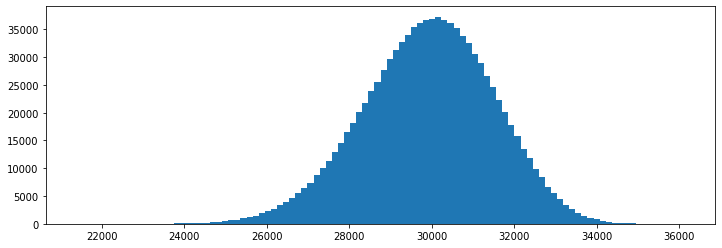

29914.86922512101 1579.1974501086495


In [11]:
plt.figure(figsize=(12,4))
plt.hist(costs, bins=100)
plt.show()

print(costs.mean(), costs.std())

## Simulated Annealing

In [12]:
def random_neighbor(p, radius):
    q = p.copy()
    for r in range(radius):
        i, j = np.random.choice(berlin52n, 2, replace=False)
        q[i], q[j] = q[j], q[i]
    return q

In [13]:
T = 500000
radius = 1
alpha = 1.0

t0 = time.time()

p = np.random.permutation(berlin52n)
p_cost = tsp_objective_function(p)
costs = np.zeros(T)
for t in range(T):
    q = random_neighbor(p, radius)
    q_cost = tsp_objective_function(q)
    if(q_cost < p_cost):
        p, p_cost = q, q_cost
    elif(np.random.rand() < np.exp(- alpha * (q_cost - p_cost) * t/T)):
        p, p_cost = q, q_cost
    costs[t] = p_cost

print(time.time() - t0, costs.min())

39.36347055435181 8759.56266687524


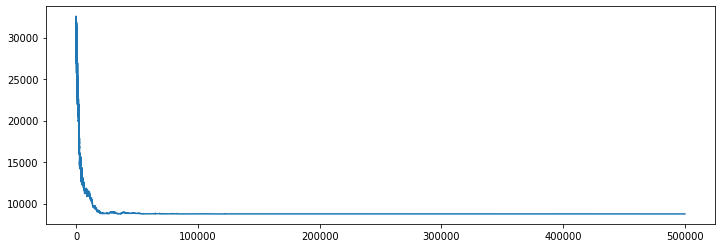

In [14]:
plt.figure(figsize=(12,4))
plt.plot(costs)
plt.show()

## SGA-PMX

In [15]:
def ispermutation( p ):
    for i in range(p.shape[0]):
        if i not in p:
            print("indekss", i)
            return False
    return True

def PMX(ind1, ind2):
    s = ind1.shape[0]
    o1 = np.zeros(s, dtype=np.int32)
    o2 = np.zeros(s, dtype=np.int32)
    beg = np.random.randint(s - 1)
    end = np.random.randint(beg + 1, s)

    o1[beg:end] = ind2[beg:end]
    o2[beg:end] = ind1[beg:end]

    pairing = {}
    for i in range(beg, end):
        pairing[o1[i]] = o2[i]
        pairing[o2[i]] = o1[i]
    
    for i in range(0, beg):
        x = ind1[i]
        if x in o2[beg:end]:
            o2[i] = pairing[x]
        else:
            o2[i] = x

        y = ind2[i]
        if y in o1[beg:end]:
            o1[i] = pairing[y]
        else:
            o1[i] = y

    for i in range(end, s):
        x = ind1[i]
        if x in o2[beg:end]:
            o2[i] = pairing[x]
        else:
            o2[i] = x

        y = ind2[i]
        if y in o1[beg:end]:
            o1[i] = pairing[y]
        else:
            o1[i] = y

    if not ispermutation(o1) or not ispermutation(o2):
        print( "beg, end:\n", beg, end )
        print( "ind1, ind2:\n", ind1, ind2 )
        print( "ind1[b:e], ind2[b:e]:\n", ind1[beg:end], ind2[beg:end] )
        print( "o1, o2:\n", o1, o2 )
        print( "o1[b:e], o2[b:e]:\n", o1[beg:end], o2[beg:end] )
        return 'zle'

    return o1, o2

In [16]:
def reverse_sequence_mutation(p):
    a = np.random.choice(len(p), 2, False)
    i, j = a.min(), a.max()
    q = p.copy()
    q[i:j+1] = q[i:j+1][::-1]
    return q

def transposition_mutation(p):
    a = np.random.choice(len(p), 2, False)
    i, j = a.min(), a.max()
    q = p.copy()
    tmp = q[i]
    q[i] = q[j]
    q[j] = tmp
    return q
    

In [17]:
def SGA(n, objfunction, number_of_iterations=250):
    population_size = 500
    chromosome_length = n
    number_of_offspring = population_size
    crossover_probability = 0.95
    mutation_probability = 0.25

    time0 = time.time()

    best_objective_value = np.Inf
    best_chromosome = np.zeros((1, chromosome_length))

    # generating an initial population
    current_population = np.zeros((population_size, chromosome_length), dtype=np.int64)
    for i in range(population_size):
        current_population[i, :] = np.random.permutation(chromosome_length)

    # evaluating the objective function on the current population
    objective_values = np.zeros(population_size)
    for i in range(population_size):
        objective_values[i] =  objfunction(current_population[i, :])

    plotdata = np.zeros((4,number_of_iterations))
    for t in range(number_of_iterations):

        # selecting the parent indices by the roulette wheel method
        fitness_values = objective_values.max() - objective_values
        if fitness_values.sum() > 0:
            fitness_values = fitness_values / fitness_values.sum()
        else:
            fitness_values = np.ones(population_size) / population_size
        parent_indices = np.random.choice(population_size, number_of_offspring, True, fitness_values).astype(np.int64)

        # creating the children population
        children_population = np.zeros((number_of_offspring, chromosome_length), dtype=np.int64)
        for i in range(int(number_of_offspring/2)):
            if np.random.random() < crossover_probability:
                children_population[2*i, :], children_population[2*i+1, :] = PMX(current_population[parent_indices[2*i], :].copy(), current_population[parent_indices[2*i+1], :].copy())
            else:
                children_population[2*i, :], children_population[2*i+1, :] = current_population[parent_indices[2*i], :].copy(), current_population[parent_indices[2*i+1]].copy()
        if np.mod(number_of_offspring, 2) == 1:
            children_population[-1, :] = current_population[parent_indices[-1], :]

        # mutating the children population
        for i in range(number_of_offspring):
            if np.random.random() < mutation_probability:
                children_population[i, :] = reverse_sequence_mutation(children_population[i, :])

        # evaluating the objective function on the children population
        children_objective_values = np.zeros(number_of_offspring)
        for i in range(number_of_offspring):
            children_objective_values[i] =  objfunction(children_population[i, :])

        # replacing the current population by (Mu + Lambda) Replacement
        objective_values = np.hstack([objective_values, children_objective_values])
        current_population = np.vstack([current_population, children_population])

        I = np.argsort(objective_values)
        current_population = current_population[I[:population_size], :]
        objective_values = objective_values[I[:population_size]]

        # recording some statistics
        if best_objective_value < objective_values[0]:
            best_objective_value = objective_values[0]
            best_chromosome = current_population[0, :]

        plotdata[0, t] = objective_values.min()
        plotdata[1, t] = objective_values.mean()
        plotdata[2, t] = objective_values.max()
        plotdata[3, t] = objective_values.std()

        print('%3d %14.8f %12.8f %12.8f %12.8f %12.8f' % (t, time.time() - time0, objective_values.min(), objective_values.mean(), objective_values.max(), objective_values.std()))
    return plotdata

  0     0.33125544 24824.76584208 28424.64888234 29707.79530658 1052.39925895
  1     0.58381128 24824.76584208 27064.37997806 28145.33609626 812.67327052
  2     0.88186550 24656.62371301 26099.19054297 26882.20495695 600.66878614
  3     1.21195364 24323.87326321 25375.90651640 25703.71255622 243.74418777
  4     1.48876929 23859.26552983 25070.22548080 25432.49211728 308.08444933
  5     1.73478460 23594.23268538 24677.41109748 24848.46083146 213.66944063
  6     1.99342942 23497.99502580 24321.61388057 24656.62371301 278.07494319
  7     2.23723292 22895.74883964 23949.59871439 24289.44234109 198.70051269
  8     2.48315954 22612.35983734 23746.89342296 23859.26552983 176.75355734
  9     2.72533655 22149.33432414 23417.35480110 23714.31768729 292.61267096
 10     2.96199632 22149.33432414 23001.71345631 23416.58591986 319.30976955
 11     3.20322895 21460.07207085 22594.77545309 22895.74883964 193.47328007
 12     3.44640684 21313.26358376 22391.41558324 22612.35983734 233.4563456

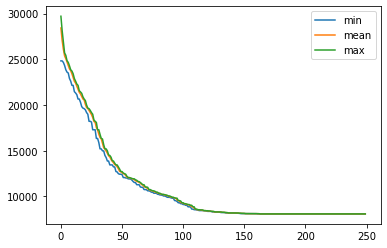

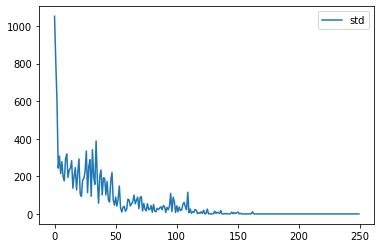

In [18]:
plotdata = SGA(berlin52n, tsp_objective_function)

plt.plot(plotdata[0], label='min')
plt.plot(plotdata[1], label='mean')
plt.plot(plotdata[2], label='max')
plt.legend()
plt.show()

plt.plot(plotdata[3], label='std')
plt.legend()
plt.show()

In [19]:
def SGAtransposition(n, objfunction):
    population_size = 500
    chromosome_length = n
    number_of_offspring = population_size
    crossover_probability = 0.95
    mutation_probability = 0.25
    number_of_iterations = 250

    time0 = time.time()

    best_objective_value = np.Inf
    best_chromosome = np.zeros((1, chromosome_length))

    # generating an initial population
    current_population = np.zeros((population_size, chromosome_length), dtype=np.int64)
    for i in range(population_size):
        current_population[i, :] = np.random.permutation(chromosome_length)

    # evaluating the objective function on the current population
    objective_values = np.zeros(population_size)
    for i in range(population_size):
        objective_values[i] = objfunction(current_population[i, :])

    plotdata = np.zeros((4,number_of_iterations))
    for t in range(number_of_iterations):

        # selecting the parent indices by the roulette wheel method
        fitness_values = objective_values.max() - objective_values
        if fitness_values.sum() > 0:
            fitness_values = fitness_values / fitness_values.sum()
        else:
            fitness_values = np.ones(population_size) / population_size
        parent_indices = np.random.choice(population_size, number_of_offspring, True, fitness_values).astype(np.int64)

        # creating the children population
        children_population = np.zeros((number_of_offspring, chromosome_length), dtype=np.int64)
        for i in range(int(number_of_offspring/2)):
            if np.random.random() < crossover_probability:
                children_population[2*i, :], children_population[2*i+1, :] = PMX(current_population[parent_indices[2*i], :].copy(), current_population[parent_indices[2*i+1], :].copy())
            else:
                children_population[2*i, :], children_population[2*i+1, :] = current_population[parent_indices[2*i], :].copy(), current_population[parent_indices[2*i+1]].copy()
        if np.mod(number_of_offspring, 2) == 1:
            children_population[-1, :] = current_population[parent_indices[-1], :]

        # mutating the children population
        for i in range(number_of_offspring):
            if np.random.random() < mutation_probability:
                children_population[i, :] = transposition_mutation(children_population[i, :])

        # evaluating the objective function on the children population
        children_objective_values = np.zeros(number_of_offspring)
        for i in range(number_of_offspring):
            children_objective_values[i] = objfunction(children_population[i, :])

        # replacing the current population by (Mu + Lambda) Replacement
        objective_values = np.hstack([objective_values, children_objective_values])
        current_population = np.vstack([current_population, children_population])

        I = np.argsort(objective_values)
        current_population = current_population[I[:population_size], :]
        objective_values = objective_values[I[:population_size]]

        # recording some statistics
        if best_objective_value < objective_values[0]:
            best_objective_value = objective_values[0]
            best_chromosome = current_population[0, :]

        plotdata[0, t] = objective_values.min()
        plotdata[1, t] = objective_values.mean()
        plotdata[2, t] = objective_values.max()
        plotdata[3, t] = objective_values.std()

        print('%3d %14.8f %12.8f %12.8f %12.8f %12.8f' % (t, time.time() - time0, objective_values.min(), objective_values.mean(), objective_values.max(), objective_values.std()))
    return plotdata

In [20]:
def makeplots(plotdata):
    plt.plot(plotdata[0], label='min')
    plt.plot(plotdata[1], label='mean')
    plt.plot(plotdata[2], label='max')
    plt.legend()
    plt.show()

    plt.plot(plotdata[3], label='std')
    plt.legend()
    plt.show()

  0     0.27114010 25581.87046994 28473.35404413 29694.53277393 962.92277231
  1     0.51218176 24828.80483533 27276.56894914 28253.10856841 740.34346484
  2     0.75208759 24129.48753764 26368.26917938 27033.42710547 516.69723957
  3     0.98904204 24118.15725951 25739.39660297 26212.86760313 372.89851297
  4     1.23208308 24118.15725951 25302.37775432 25625.70489874 428.89212066
  5     1.47314191 23361.40925605 24623.90799064 25147.06884100 379.77275038
  6     1.71833158 23361.40925605 24150.13749806 24454.77307859 131.00975596
  7     1.95265961 23212.67454605 24052.29764830 24129.48753764 146.90894975
  8     2.18528390 22377.51693216 23730.53602019 24011.90314517 246.41567320
  9     2.42484546 22243.87443391 23420.47916007 23675.98846429 199.58057883
 10     2.66874719 21907.60866058 23186.69296422 23361.40925605 273.38433721
 11     2.99188828 21442.90159724 22701.41295509 23138.96962962 338.38065124
 12     3.30465841 21442.90159724 22309.65068183 22591.14321106 184.51508877

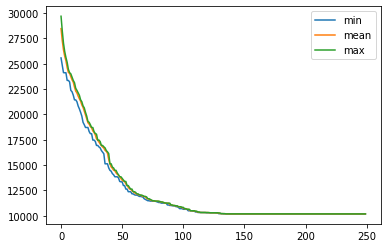

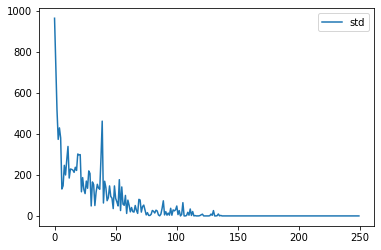

In [21]:
berlin52plot = SGAtransposition(berlin52n, tsp_objective_function)
makeplots(berlin52plot)

In [22]:
def objfunctionforE(E, n, p):
    s = 0.0
    for i in range(n):
        s += E[p[i-1], p[i]]
    return s

def openproblem(name):
    problem = tsplib95.load(name)
    probn = problem.dimension
    probedges = problem.get_edges()
    E = np.empty((probn, probn))
    for (a, b) in probedges:
        E[a - 1, b - 1] = problem.get_weight(a, b)
    return probn, E

bayg29n, bayg29E = openproblem("bayg29.tsp")
bayg29opttour = tsplib95.load("bayg29.opt.tour").tours
print(bayg29opttour)

bays29n, bays29E = openproblem("bays29.tsp")
bays29opttour = tsplib95.load("bays29.opt.tour").tours
print(bays29opttour)

kroa100n, kroa100E = openproblem("kroA100.tsp")
kroa100opttour = tsplib95.load("kroA100.opt.tour").tours
print(kroa100opttour)

kroa150n, kroa150E = openproblem("kroA150.tsp")
kroa200n, kroa200E = openproblem("kroA200.tsp")

[[1, 28, 6, 12, 9, 26, 3, 29, 5, 21, 2, 20, 10, 4, 15, 18, 14, 17, 22, 11, 19, 25, 7, 23, 8, 27, 16, 13, 24]]
[[1, 28, 6, 12, 9, 5, 26, 29, 3, 2, 20, 10, 4, 15, 18, 17, 14, 22, 11, 19, 25, 7, 23, 27, 8, 24, 16, 13, 21]]
[[1, 47, 93, 28, 67, 58, 61, 51, 87, 25, 81, 69, 64, 40, 54, 2, 44, 50, 73, 68, 85, 82, 95, 13, 76, 33, 37, 5, 52, 78, 96, 39, 30, 48, 100, 41, 71, 14, 3, 43, 46, 29, 34, 83, 55, 7, 9, 57, 20, 12, 27, 86, 35, 62, 60, 77, 23, 98, 91, 45, 32, 11, 15, 17, 59, 74, 21, 72, 10, 84, 36, 99, 38, 24, 18, 79, 53, 88, 16, 94, 22, 70, 66, 26, 65, 4, 97, 56, 80, 31, 89, 42, 8, 92, 75, 19, 90, 49, 6, 63]]


In [23]:
def bayg29objf(p):
    return objfunctionforE( bayg29E, bayg29n, p )
bayg29plot = SGA(bayg29n, bayg29objf)


  0     0.17272186 3517.00000000 4387.05600000 4696.00000000 223.64439824
  1     0.31007385 3516.00000000 4111.62000000 4345.00000000 192.96701169
  2     0.44949031 3498.00000000 3874.39400000 4072.00000000 166.11177792
  3     0.58340693 3380.00000000 3671.92800000 3857.00000000 135.92234112
  4     0.72685695 3247.00000000 3514.66200000 3587.00000000  30.34296881
  5     0.85984707 3247.00000000 3495.84200000 3517.00000000  48.49302049
  6     0.99865031 3036.00000000 3379.55600000 3491.00000000  81.21760193
  7     1.14187717 2958.00000000 3279.88400000 3377.00000000  60.49299583
  8     1.28303838 2844.00000000 3224.30400000 3247.00000000  57.18803707
  9     1.41535306 2844.00000000 3083.18200000 3202.00000000  81.51177140
 10     1.55530858 2834.00000000 2991.72000000 3044.00000000  51.70649476
 11     1.68833089 2715.00000000 2922.60200000 2958.00000000  50.73988171
 12     1.82855988 2715.00000000 2841.90200000 2895.00000000  29.80819344
 13     1.95972228 2683.00000000 2820.

bayg29 optimal result:  1610.0


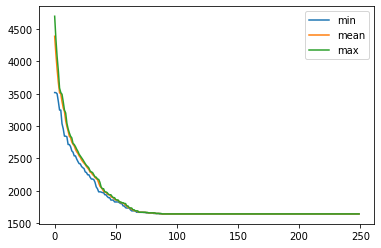

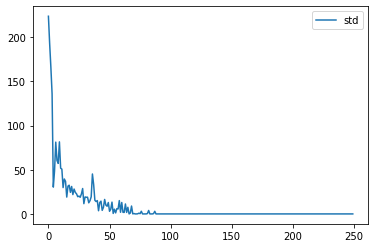

In [24]:
print("bayg29 optimal result: ", bayg29objf(np.array(bayg29opttour[0])-1) )
makeplots(bayg29plot)

In [25]:
def bays29objf(p):
    return objfunctionforE( bays29E, bays29n, p )
bays29plot = SGA(bays29n, bays29objf)

  0     0.17429495 4668.00000000 5598.72400000 6007.00000000 280.87531722
  1     0.31471848 4648.00000000 5247.25800000 5542.00000000 206.22100629
  2     0.45932388 4600.00000000 5000.61400000 5193.00000000 145.29914316
  3     0.60258365 4427.00000000 4820.79800000 4968.00000000 113.18526934
  4     0.75230098 4246.00000000 4679.29800000 4802.00000000  62.50933687
  5     0.89439988 4246.00000000 4627.93200000 4668.00000000  72.51109830
  6     1.04201007 4158.00000000 4489.03600000 4612.00000000 113.71516479
  7     1.18941164 3978.00000000 4350.36200000 4427.00000000  79.71706816
  8     1.33118939 3805.00000000 4246.96400000 4337.00000000  69.59300758
  9     1.47473407 3805.00000000 4172.85200000 4246.00000000  94.81446143
 10     1.61314511 3734.00000000 4021.89000000 4158.00000000  92.80257486
 11     1.75920773 3648.00000000 3929.99800000 4002.00000000  79.01236610
 12     1.90687132 3461.00000000 3814.52800000 3910.00000000  45.28546363
 13     2.04452133 3461.00000000 3783.

bays29 optimal result:  2020.0


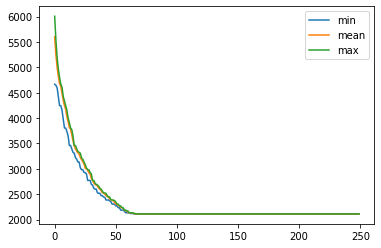

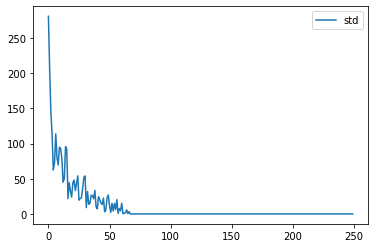

In [26]:
print("bays29 optimal result: ", bays29objf(np.array(bays29opttour[0])-1) )
makeplots(bays29plot)

In [27]:
def kroa100objf(p):
    return objfunctionforE( kroa100E, kroa100n, p )
kroa100plot = SGA(kroa100n, kroa100objf, 500)

  0     0.48838186 145887.00000000 162541.82000000 169608.00000000 5256.48274035
  1     0.92367744 145887.00000000 155947.08000000 161199.00000000 3721.94341300
  2     1.38911700 143961.00000000 151544.56400000 154469.00000000 2461.13943731
  3     1.83688903 142473.00000000 148283.11600000 151314.00000000 2102.91578779
  4     2.27390075 140857.00000000 145803.29400000 146457.00000000 704.20907092
  5     2.70603061 140115.00000000 144738.00600000 145887.00000000 1233.47609055
  6     3.15275311 136179.00000000 142778.02200000 144153.00000000 1286.51321700
  7     3.58540154 136179.00000000 141055.01600000 142473.00000000 1083.69104072
  8     4.02677345 133568.00000000 139689.57800000 140857.00000000 1339.60813670
  9     4.46932077 132319.00000000 137611.79600000 139482.00000000 1382.75970811
 10     4.90501904 129963.00000000 135993.02200000 137190.00000000 926.12459935
 11     5.35417557 129084.00000000 134914.17600000 136179.00000000 1242.14748763
 12     5.80598450 127684.0000

kroa100 optimal result:  21282.0


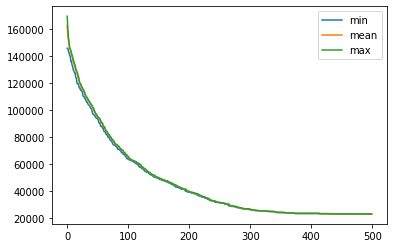

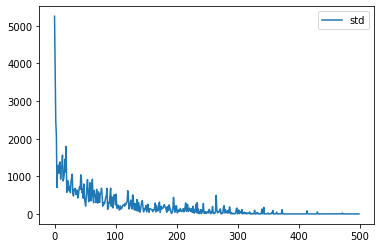

In [28]:
print("kroa100 optimal result: ", kroa100objf(np.array(kroa100opttour[0])-1) )
makeplots(kroa100plot)

In [29]:
def kroa150objf(p):
    return objfunctionforE( kroa150E, kroa150n, p )
kroa150plot = SGA(kroa150n, kroa150objf, 1000)

  0     0.84905219 226358.00000000 248730.08600000 256158.00000000 6078.90914150
  1     1.77621984 223846.00000000 241462.10600000 248006.00000000 5272.30852234
  2     2.76300049 223846.00000000 234384.63400000 240300.00000000 4190.62111626
  3     3.58859849 223019.00000000 229376.96400000 233705.00000000 2506.32823044
  4     4.43202662 219949.00000000 226420.15600000 230019.00000000 1689.31305437
  5     5.22458816 219558.00000000 224872.62600000 226358.00000000 1168.16830728
  6     6.09514427 219126.00000000 223487.15800000 224409.00000000 968.93707796
  7     6.89159918 216269.00000000 221971.74600000 223658.00000000 1507.41459243
  8     7.62833762 216269.00000000 219858.51800000 221601.00000000 939.36103692
  9     8.34344101 215487.00000000 218883.66800000 219945.00000000 1034.52444426
 10     9.07828140 214283.00000000 217342.75200000 218669.00000000 854.27231402
 11     9.81138587 212376.00000000 216398.91600000 216927.00000000 644.13532813
 12    10.54231215 210407.000000

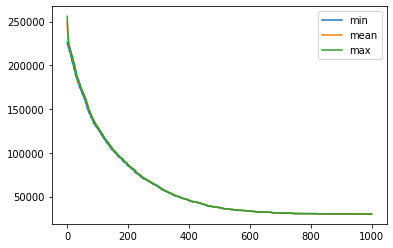

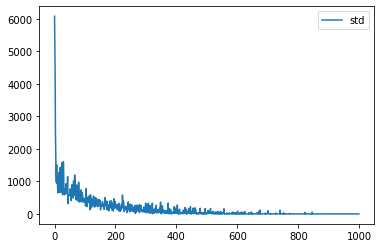

In [30]:
#print("kroa150 optimal result: ", kroa150objf(np.array(kroa150opttour[0])-1) )
makeplots(kroa150plot)

In [31]:
def kroa200objf(p):
    return objfunctionforE( kroa200E, kroa200n, p )
kroa200plot = SGA(kroa200n, kroa200objf, 1500)

  0     0.96424365 301308.00000000 329116.46000000 337821.00000000 6537.41273260
  1     1.89495492 301308.00000000 321018.13800000 326984.00000000 4982.79800744
  2     2.80481720 301224.00000000 314365.03800000 319867.00000000 5509.62532960
  3     3.71340919 297069.00000000 306204.14000000 311286.00000000 2854.58630145
  4     4.59982824 297069.00000000 303603.91600000 304296.00000000 1170.03532637
  5     5.53502059 290570.00000000 301088.25800000 303682.00000000 1592.43620891
  6     6.44387627 289215.00000000 299398.27400000 301224.00000000 1873.53375388
  7     7.37731862 287809.00000000 296698.44000000 299038.00000000 2030.20309684
  8     8.39305472 287130.00000000 293886.32400000 297069.00000000 2911.88584512
  9     9.39500475 284715.00000000 290100.32200000 293161.00000000 1374.67482348
 10    10.35890317 284066.00000000 288623.09600000 290000.00000000 1049.46025117
 11    11.34021616 280495.00000000 287309.00600000 288591.00000000 1227.47063915
 12    12.33711028 280495.00

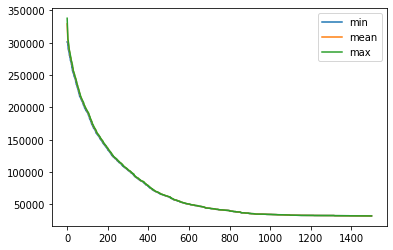

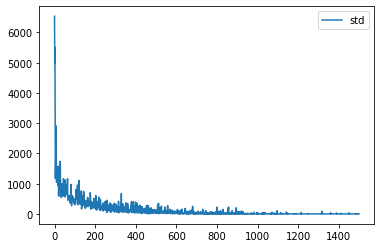

In [32]:
makeplots(kroa200plot)

In [33]:
def OX(p1, p2):
    s = p1.shape[0]
    o1 = np.zeros(s, dtype=np.int32)
    o2 = np.zeros(s, dtype=np.int32)
    beg = np.random.randint(s - 1)
    end = np.random.randint(beg + 1, s)

    beg = 3
    end = 7

    o1[beg:end] = p1[beg:end]
    o2[beg:end] = p2[beg:end]

    l1 = []
    l2 = []
    for i in range(end, s):
        if p2[i] not in o1[beg:end]:
            l1.append(p2[i])
        if p1[i] not in o2[beg:end]:
            l2.append(p1[i])

    for i in range(0, end):
        if p2[i] not in o1[beg:end]:
            l1.append(p2[i])
        if p1[i] not in o2[beg:end]:
            l2.append(p1[i])

    #print( "l1: ", l1, "\nl2: ", l2)

    for i in range(end, s):
        o1[i] = l1[i - end]
        o2[i] = l2[i - end]
    for i in range(0, beg):
        o1[i] = l1[i + (s - end)]
        o2[i] = l2[i + (s - end)]

    #print( "o1: ", o1, "\no2: ", o2 )
    return o1, o2

def SGAox(n, objfunction, number_of_iterations=250):
    population_size = 500
    chromosome_length = n
    number_of_offspring = population_size
    crossover_probability = 0.95
    mutation_probability = 0.25

    time0 = time.time()

    best_objective_value = np.Inf
    best_chromosome = np.zeros((1, chromosome_length))

    # generating an initial population
    current_population = np.zeros((population_size, chromosome_length), dtype=np.int64)
    for i in range(population_size):
        current_population[i, :] = np.random.permutation(chromosome_length)

    # evaluating the objective function on the current population
    objective_values = np.zeros(population_size)
    for i in range(population_size):
        objective_values[i] =  objfunction(current_population[i, :])

    plotdata = np.zeros((4,number_of_iterations))
    for t in range(number_of_iterations):

        # selecting the parent indices by the roulette wheel method
        fitness_values = objective_values.max() - objective_values
        if fitness_values.sum() > 0:
            fitness_values = fitness_values / fitness_values.sum()
        else:
            fitness_values = np.ones(population_size) / population_size
        parent_indices = np.random.choice(population_size, number_of_offspring, True, fitness_values).astype(np.int64)

        # creating the children population
        children_population = np.zeros((number_of_offspring, chromosome_length), dtype=np.int64)
        for i in range(int(number_of_offspring/2)):
            if np.random.random() < crossover_probability:
                children_population[2*i, :], children_population[2*i+1, :] = OX(current_population[parent_indices[2*i], :].copy(), current_population[parent_indices[2*i+1], :].copy())
            else:
                children_population[2*i, :], children_population[2*i+1, :] = current_population[parent_indices[2*i], :].copy(), current_population[parent_indices[2*i+1]].copy()
        if np.mod(number_of_offspring, 2) == 1:
            children_population[-1, :] = current_population[parent_indices[-1], :]

        # mutating the children population
        for i in range(number_of_offspring):
            if np.random.random() < mutation_probability:
                children_population[i, :] = reverse_sequence_mutation(children_population[i, :])

        # evaluating the objective function on the children population
        children_objective_values = np.zeros(number_of_offspring)
        for i in range(number_of_offspring):
            children_objective_values[i] =  objfunction(children_population[i, :])

        # replacing the current population by (Mu + Lambda) Replacement
        objective_values = np.hstack([objective_values, children_objective_values])
        current_population = np.vstack([current_population, children_population])

        I = np.argsort(objective_values)
        current_population = current_population[I[:population_size], :]
        objective_values = objective_values[I[:population_size]]

        # recording some statistics
        if best_objective_value < objective_values[0]:
            best_objective_value = objective_values[0]
            best_chromosome = current_population[0, :]

        plotdata[0, t] = objective_values.min()
        plotdata[1, t] = objective_values.mean()
        plotdata[2, t] = objective_values.max()
        plotdata[3, t] = objective_values.std()

        print('%3d %14.8f %12.8f %12.8f %12.8f %12.8f' % (t, time.time() - time0, objective_values.min(), objective_values.mean(), objective_values.max(), objective_values.std()))
    return plotdata

In [34]:
kroa100plotox = SGAox(kroa100n, kroa100objf, 500)
print("kroa100 optimal result: ", kroa100objf(np.array(kroa100opttour[0])-1) )
print("kroa100 pmx result: ", kroa100plot[0,-1])
print("kroa100 ox result: ", kroa100plotox[0, -1])


  0     0.43183708 143695.00000000 162773.51800000 169441.00000000 5082.53909436
  1     0.81576109 140806.00000000 156097.74400000 161657.00000000 4383.05004517
  2     1.19269156 137450.00000000 150334.81600000 155071.00000000 3577.62511593
  3     1.55250716 135001.00000000 145849.33400000 149928.00000000 2977.58294098
  4     1.92360544 131378.00000000 141951.67800000 145447.00000000 2785.11733295
  5     2.28764367 129215.00000000 138134.82400000 141424.00000000 2482.91532055
  6     2.65285063 125353.00000000 134391.42000000 137529.00000000 2355.84861899
  7     3.05184841 121982.00000000 131058.29400000 133845.00000000 2234.97329191
  8     3.45999312 120505.00000000 127997.49800000 130824.00000000 2366.01296404
  9     3.91128039 118492.00000000 124744.19400000 127530.00000000 1982.91096935
 10     4.32704258 115981.00000000 122254.60800000 124147.00000000 1468.89674461
 11     4.66280389 113261.00000000 120266.45200000 122146.00000000 1587.04469115
 12     5.00389743 111258.00

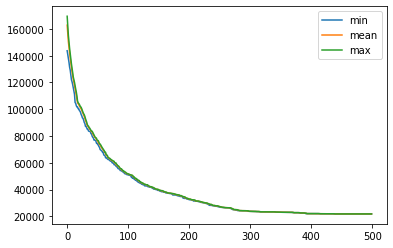

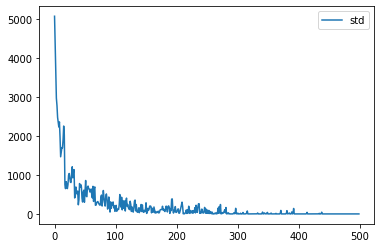

In [35]:
makeplots(kroa100plotox)

In [68]:
import itertools

def permutations_diff_on_k(p, n, k):
    res = []
    for kc in itertools.combinations(range(n), k):
        for kcp in itertools.permutations(kc):
            tmp = p.copy()
            for i in range(k):
                tmp[kcp[i]] = p[kcp[(i + 1) % k]]
            res.append(tmp)

    return res

def localsearch(p, n, k, F):
    perm = permutations_diff_on_k(p, n, k)
    bestres = F(p)
    bestperm = p
    for i in perm:
        permres = F(i)
        if permres > bestres:
            bestres = permres
            bestperm = i
        
    return bestperm

def localsearch_iter(p, n, k, F):
    newbestres = True
    bestperm = p
    bestres = F(p)
    while( newbestres ):
        newbestres = False
        perm = permutations_diff_on_k(bestperm, n, k)
        for i in perm:
            permres = F(i)
            #print("i: ", i)
            #print("permres: ", i)
            if permres > bestres:
                bestres = permres
                bestperm = i
                newbestres = True

    return bestperm



In [53]:

def SGAoxwithlocalsearch(n, objfunction, mutationfunction, kformutation, number_of_iterations=250):
    population_size = 500
    chromosome_length = n
    number_of_offspring = population_size
    crossover_probability = 0.95
    mutation_probability = 0.25

    time0 = time.time()

    best_objective_value = np.Inf
    best_chromosome = np.zeros((1, chromosome_length))

    # generating an initial population
    current_population = np.zeros((population_size, chromosome_length), dtype=np.int64)
    for i in range(population_size):
        current_population[i, :] = np.random.permutation(chromosome_length)

    # evaluating the objective function on the current population
    objective_values = np.zeros(population_size)
    for i in range(population_size):
        objective_values[i] =  objfunction(current_population[i, :])

    plotdata = np.zeros((4,number_of_iterations))
    for t in range(number_of_iterations):

        # selecting the parent indices by the roulette wheel method
        fitness_values = objective_values.max() - objective_values
        if fitness_values.sum() > 0:
            fitness_values = fitness_values / fitness_values.sum()
        else:
            fitness_values = np.ones(population_size) / population_size
        parent_indices = np.random.choice(population_size, number_of_offspring, True, fitness_values).astype(np.int64)

        # creating the children population
        children_population = np.zeros((number_of_offspring, chromosome_length), dtype=np.int64)
        for i in range(int(number_of_offspring/2)):
            if np.random.random() < crossover_probability:
                children_population[2*i, :], children_population[2*i+1, :] = OX(current_population[parent_indices[2*i], :].copy(), current_population[parent_indices[2*i+1], :].copy())
            else:
                children_population[2*i, :], children_population[2*i+1, :] = current_population[parent_indices[2*i], :].copy(), current_population[parent_indices[2*i+1]].copy()
        if np.mod(number_of_offspring, 2) == 1:
            children_population[-1, :] = current_population[parent_indices[-1], :]

        # mutating the children population
        for i in range(number_of_offspring):
            if np.random.random() < mutation_probability:
                children_population[i, :] = reverse_sequence_mutation(children_population[i, :])

        for i in range(number_of_offspring):
            if np.random.random() < mutation_probability:
                children_population[i, :] = mutationfunction(children_population[i, :], n, kformutation, objfunction)

        # evaluating the objective function on the children population
        children_objective_values = np.zeros(number_of_offspring)
        for i in range(number_of_offspring):
            children_objective_values[i] =  objfunction(children_population[i, :])

        # replacing the current population by (Mu + Lambda) Replacement
        objective_values = np.hstack([objective_values, children_objective_values])
        current_population = np.vstack([current_population, children_population])

        I = np.argsort(objective_values)
        current_population = current_population[I[:population_size], :]
        objective_values = objective_values[I[:population_size]]

        # recording some statistics
        if best_objective_value < objective_values[0]:
            best_objective_value = objective_values[0]
            best_chromosome = current_population[0, :]

        plotdata[0, t] = objective_values.min()
        plotdata[1, t] = objective_values.mean()
        plotdata[2, t] = objective_values.max()
        plotdata[3, t] = objective_values.std()

        print('%3d %14.8f %12.8f %12.8f %12.8f %12.8f' % (t, time.time() - time0, objective_values.min(), objective_values.mean(), objective_values.max(), objective_values.std()))
    return plotdata

  0     0.30413294 4366.00000000 5589.02200000 5935.00000000 276.75057636
  1     0.54150724 4366.00000000 5292.04600000 5594.00000000 246.94145841
  2     0.85346580 4141.00000000 5033.55000000 5316.00000000 224.09470208
  3     1.12915039 4102.00000000 4808.20800000 5049.00000000 192.72105421
  4     1.40844727 4049.00000000 4613.97400000 4837.00000000 170.73400752
  5     1.71043229 3827.00000000 4445.55600000 4646.00000000 163.73606464
  6     2.00177717 3694.00000000 4253.36600000 4460.00000000 161.64843347
  7     2.28742194 3458.00000000 4079.25600000 4276.00000000 150.25973001
  8     2.57245970 3214.00000000 3925.42000000 4103.00000000 150.71359461
  9     2.83478761 3132.00000000 3768.04800000 3945.00000000 154.30355050
 10     3.11518979 3069.00000000 3595.86400000 3792.00000000 153.15835434
 11     3.42542601 3069.00000000 3444.54400000 3636.00000000 126.88574413
 12     3.79367805 3069.00000000 3326.22200000 3474.00000000  87.40888236
 13     4.07733202 3069.00000000 3257.

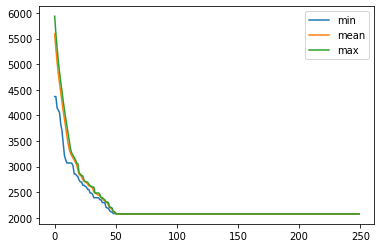

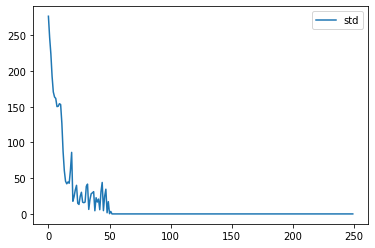

In [55]:
bays29plotoxwithlocalsearch = SGAoxwithlocalsearch(bays29n, bays29objf, localsearch, 1, 250)
print("kroa100 optimal result: ", kroa100objf(np.array(kroa100opttour[0])-1) )
print("bays29 pmx result: ", bays29plot[0,-1])
print("kroa100 with local search ox result: ", bays29plotoxwithlocalsearch[0, -1])
makeplots(bays29plotoxwithlocalsearch)

  0     0.33448339 4366.00000000 5566.13200000 5894.00000000 242.26941734
  1     0.65728116 4271.00000000 5281.79800000 5563.00000000 238.82621547
  2     0.94190598 4127.00000000 4977.17600000 5284.00000000 257.94998163
  3     1.24215150 3728.00000000 4656.33200000 4961.00000000 237.40510057
  4     1.49908566 3689.00000000 4405.77600000 4664.00000000 187.94541182
  5     1.85906887 3646.00000000 4229.81000000 4438.00000000 161.68894180
  6     2.16628933 3403.00000000 4060.21600000 4256.00000000 158.92715735
  7     2.52779984 3345.00000000 3900.91800000 4082.00000000 145.78667729
  8     2.82439446 3050.00000000 3747.20800000 3936.00000000 158.12686279
  9     3.13219380 3033.00000000 3593.33400000 3783.00000000 149.39446591
 10     3.39986944 3033.00000000 3450.58200000 3623.00000000 132.24585920
 11     3.76219273 2968.00000000 3314.18600000 3457.00000000 116.52693853
 12     4.01084971 2938.00000000 3181.23600000 3322.00000000  97.31203576
 13     4.31033564 2938.00000000 3080.

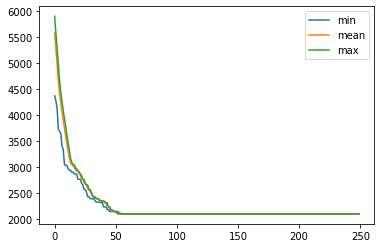

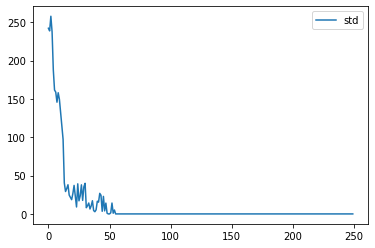

In [71]:
bays29plotoxwithlocalsearchiter = SGAoxwithlocalsearch(bays29n, bays29objf, localsearch_iter, 1, 250)
print("bays29 pmx result: ", bays29plot[0,-1])
print("bays29 with local search ox result: ", bays29plotoxwithlocalsearchiter[0, -1])
makeplots(bays29plotoxwithlocalsearchiter)

In [72]:
bayg29plotoxwithlocalsearchiter = SGAoxwithlocalsearch(bayg29n, bayg29objf, localsearch_iter, 2, 250)
print("bayg29 optimal result: ", bayg29objf(np.array(bayg29opttour[0])-1) )
print("bayg29 pmx result: ", bayg29plot[0,-1])
print("bayg29 with local search ox result: ", bayg29plotoxwithlocalsearchiter[0, -1])
makeplots(bayg29plotoxwithlocalsearchiter)

KeyboardInterrupt: 